# Exploratory Data Analysis of Corpus, Preprocessed Data and Dataset

In [2]:
%matplotlib inline

from os import listdir, mkdir
from os.path import isfile, join
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import pylab
import string

## Functions

### Zipf's Law

Code adapted from https://github.com/scattana/zipfs-law.

In [3]:
def zipf(text):
    fdis = dict(FreqDist(text))
    freq = [item[1] for item in sorted(fdis.items(), key=lambda kv: kv[1], reverse=True)]
    rank = [item+1 for item in range(len(sorted(fdis.items(), key=lambda kv: kv[1], reverse=True)))]
    
    # plot freq vs rank using pylab
    pylab.figure()
    pylab.plot(rank, freq)

    # change plot to log scale to visually confirm Zipf's Law
    pylab.xscale("log")
    pylab.yscale("log")

    # add axis labels, title, and legend
    pylab.xlabel('Rank')
    pylab.ylabel('Frequency')
    pylab.title('Logorithmic Frequency vs Rank for Words in a Text')
    pylab.legend(loc='upper right')

### Most and less frequent words

In [4]:
def mostAndLess(text):
    words = word_tokenize(text)
    wordDist = FreqDist(w.lower() for w in words)
    
    mc = wordDist.most_common()
    most = mc[0:20]
    less = mc[-21:]

    print("20 MOST FREQUENT WORDS:")
    print(most)
    
    print("--------")
        
    print("20 LESS FREQUENT WORDS:")
    print(less)
    

## Corpus Analysis

### Most frequent word cloud

In [5]:
foldersPath = "../../data/classified_org_txt/"
folders = [(folder, join(foldersPath, folder)) for folder in listdir(foldersPath) if not isfile(join(foldersPath, folder)) and not folder.startswith('.')]

foldersContent = {}
totalCorpus = ""
for (folder, folderPath) in folders:
    files = [(file, join(folderPath, file)) for file in listdir(folderPath) if isfile(join(folderPath, file)) and not file.startswith('.')]
    
    texts = ""
    for (file, filePath) in files:
        with open(filePath, 'r') as f:
            texts = texts + f.read()
            
    totalCorpus = totalCorpus + texts
    
    foldersContent[folder] = texts

In [6]:
clouds = {}
for group in foldersContent:
    clouds[group] = WordCloud(width=1024, height=512, background_color="white", max_words=30).generate(foldersContent[group])

In [ ]:
fig = plt.figure(figsize=(12,12), dpi=250)
i = 1
for group in clouds:
    ax = fig.add_subplot(6,3,i)
    ax.imshow(clouds[group])
    ax.title.set_text(str(group))
    ax.axis('off')
    
    i = i + 1
    
plt.savefig('words_not_preprocessed.png', bbox_inches = 'tight', pad_inches = 2)

### Zipf's Law

No handles with labels found to put in legend.


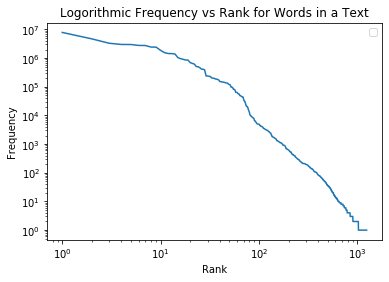

In [8]:
zipf(totalCorpus)

### Most and less frequent words

In [ ]:
mostAndLess(totalCorpus)

## Preprocessed Data Analysis

### Most frequent word cloud

In [ ]:
filesPath = "./data/preprocessed/"
files = [(file, join(filesPath, file)) for file in listdir(filesPath) if isfile(join(filesPath, file)) and not file.startswith('.')]

texts = ""
for (file, filePath) in files:
    with open(filePath, 'r') as f:
        texts = texts + f.read()

In [ ]:
wordcloud = WordCloud(width=2048, height=1024, background_color="white").generate(texts)

In [ ]:
plt.figure() 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.margins(x=0, y=0) 
plt.show()

### Zipf's Law

In [ ]:
zipf(texts)

### Most and less frequent words

In [ ]:
mostAndLess(texts)